# Tutorial 1 - Introduction To Machine Learning

> Natutral Language Processing course - 097215



## Importing The Data

In [13]:
import pandas as pd

In [14]:
DATA_PATH = 'spam_data'

train = pd.read_csv(f'{DATA_PATH}/train_spam.csv')
test = pd.read_csv(f'{DATA_PATH}/test_spam.csv')

In [15]:
train

,email,label
0,a green once said that if the spotted owl had...,0
1,substantial monthly income makers voucher inco...,1
2,from robert elz kre munnari oz au date sat NU...,0
3,so like many young children my daughter tatum ...,0
4,heh ten years ago saying the exact same words ...,0
...,...,...
678,guaranteed to increase lift and firm your bre...,1
679,______________________________________________...,1
680,hyperlink hyperlink to be removed from this l...,1
681,url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...,0


In [35]:
true = sum(train['label'])
print("there are %1d spam sentences out of %1d sentences overall, which is %1.3f percent" % (true, len(train), true/len(train)))

there are 339 spam sentences out of 683 sentences overall, which is 0.496 percent


## Creating The TF-IDF Representations

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
train_x, train_y = train['email'].tolist(), train['label'].tolist()
test_x, test_y = test['email'].tolist(), test['label'].tolist()

In [38]:
tf_vectorizer = TfidfVectorizer(lowercase=True, stop_words=None)
train_vec = tf_vectorizer.fit_transform(train_x)
test_vec = tf_vectorizer.transform(test_x)

In [39]:
print(train_vec.shape)
print(test_vec.shape)

(683, 18748)
(171, 18748)


## Training The Model

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(train_vec, train_y)

## Testing The Model

In [42]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [43]:
test_pred = classifier.predict(test_vec)

C:\Users\tomer\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


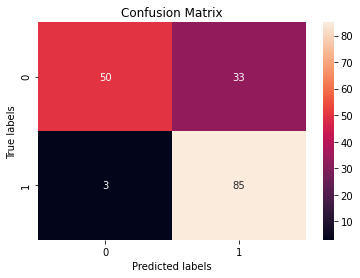

In [44]:
labels = classifier.classes_.tolist()
cm = confusion_matrix(test_y, test_pred, labels)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [50]:
f1 = f1_score(test_y, test_pred, pos_label=1)
recall = recall_score(test_y, test_pred, pos_label=1)
precision = precision_score(test_y, test_pred, pos_label=1)
accuracy = accuracy_score(test_y, test_pred)
print(f'Accuracy: %1.3f' % accuracy)
print(f'Recall: %1.3f' % recall)
print(f'Precision: %1.3f ' % precision)
print(f'F1: %1.3f ' % f1)


Accuracy: 0.789
Recall: 0.966
Precision: 0.720 
F1: 0.825 
